# Employee Attrition prediction

# Import required Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)
from sklearn.metrics import precision_score,recall_score,f1_score

# Load Dataset

In [2]:
data=pd.read_excel(r"C:\Users\ankit\Desktop\project data.xlsx")
data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,Y,11,8,0,1.0,6,1,0,0,No
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,Y,23,8,1,6.0,3,5,1,4,Yes
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,Y,15,8,3,5.0,2,5,0,3,No
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,Y,11,8,3,13.0,5,8,7,5,No
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,Y,12,8,2,9.0,2,6,0,4,No


In [3]:
data.shape

(4410, 24)

In [4]:
id=data["EmployeeID"]
employee_count=data["EmployeeCount"]
hours=data["StandardHours"]
over_18=data["Over18"]

In [5]:
data=data.drop("EmployeeID",axis=1)    
data=data.drop("EmployeeCount",axis=1)    
data=data.drop("StandardHours",axis=1)    
data=data.drop("Over18",axis=1)    

In [6]:
data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,No
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,Yes
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,No
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,No
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,No


here, we predicting that employee will leave the current company or will resign from the current company.so our target variable is Attrition.

In [7]:
data.Attrition.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

# Check information of Dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   Gender                   4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MaritalStatus            4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4391 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

In [9]:
data.describe()


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


# Check if missing value is present or not

In [10]:
data.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

# Missing value treatment

In [11]:
#NumCompaniesWorked
data.NumCompaniesWorked.value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [12]:
data.NumCompaniesWorked=data.NumCompaniesWorked.fillna(8.0)

In [13]:
#TotalWorkingYears
data.TotalWorkingYears.value_counts()

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
14.0     93
2.0      93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
25.0     42
26.0     42
28.0     42
0.0      33
29.0     30
31.0     27
32.0     27
27.0     21
30.0     21
33.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

In [14]:
data.TotalWorkingYears=data.TotalWorkingYears.fillna(38.0)

In [15]:
data.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64

# Check Datatypes

In [16]:
data.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition                   object
dtype: object

# data type conversion

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
data.Attrition=le.fit_transform(data.Attrition)
data.BusinessTravel=le.fit_transform(data.BusinessTravel)
data.Department=le.fit_transform(data.Department)
data.EducationField =le.fit_transform(data.EducationField )
data.Gender=le.fit_transform(data.Gender)
data.JobRole=le.fit_transform(data.JobRole)
data.MaritalStatus=le.fit_transform(data.MaritalStatus)

In [19]:
data.dtypes

Age                          int64
BusinessTravel               int32
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
Gender                       int32
JobLevel                     int64
JobRole                      int32
MaritalStatus                int32
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition                    int32
dtype: object

# Data Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

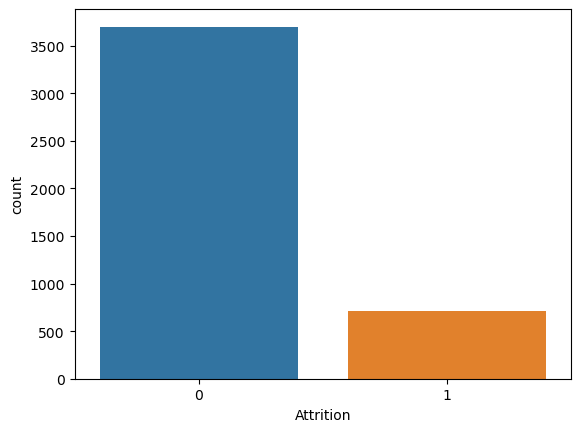

In [20]:
sns.countplot("Attrition",data=data)


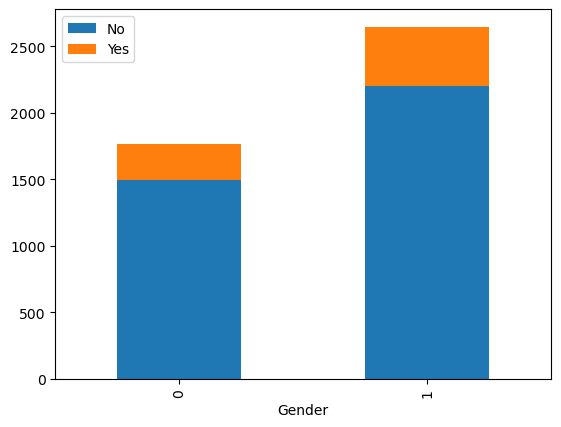

In [21]:
z=pd.crosstab(data["Gender"],data["Attrition"])
z.plot(kind="bar",stacked=True)
plt.legend(["No","Yes"])

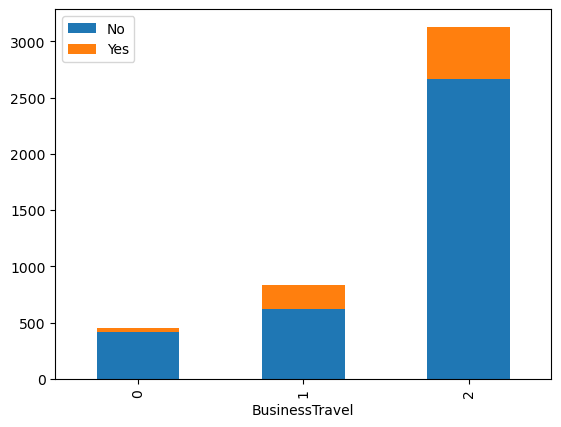

In [22]:
z=pd.crosstab(data["BusinessTravel"],data["Attrition"])
z.plot(kind="bar",stacked=True)
plt.legend(["No","Yes"])

<AxesSubplot:xlabel='Education'>

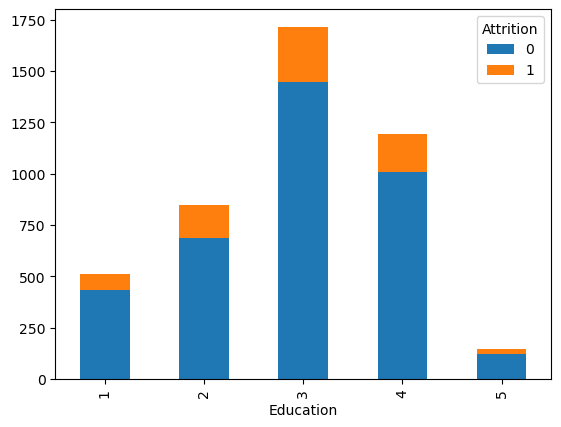

In [23]:
z1=pd.crosstab(data["Education"],data["Attrition"])
z1.plot(kind="bar",stacked=True)

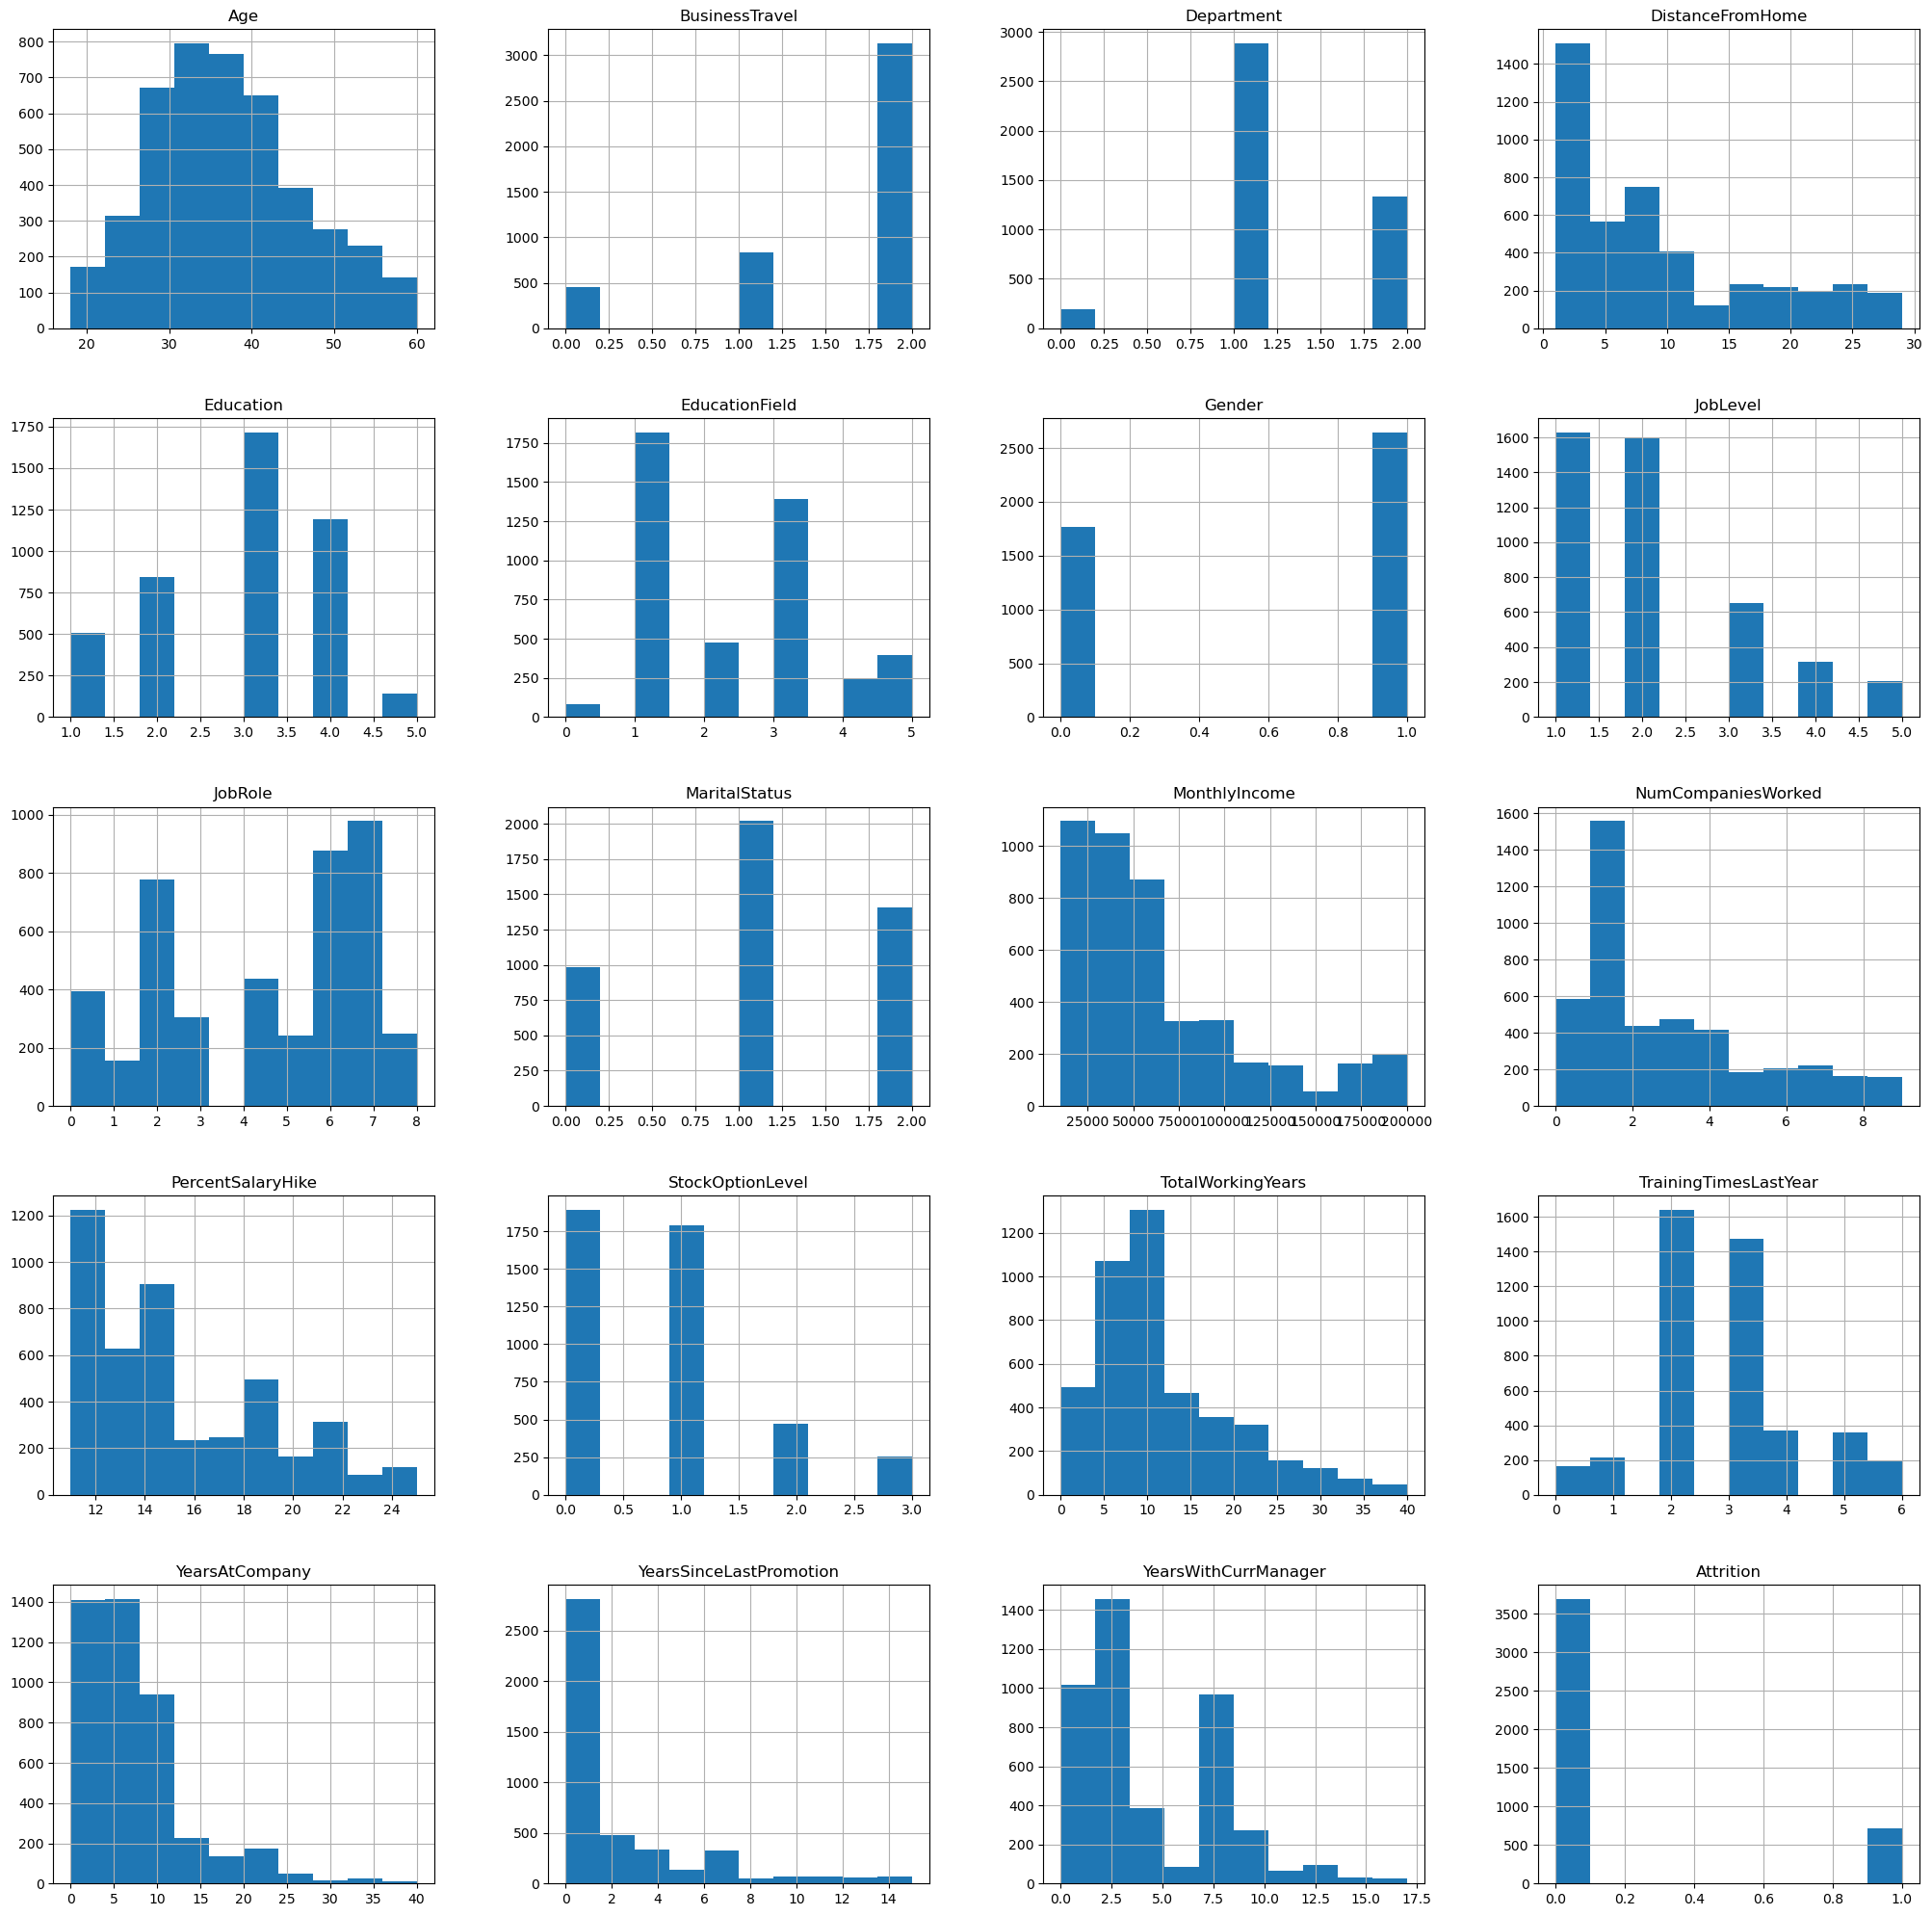

In [24]:
data.hist(figsize=(25,25))
plt.show()

# Model Building 

In [25]:
#split Data
x=data.iloc[:,0:19]
y=data.iloc[:,-1]

# Train-Test-Split

In [25]:
import sklearn
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3528, 19), (882, 19), (3528,), (882,))

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [29]:
lg.fit(x_train,y_train)

LogisticRegression()

In [30]:
lg_p=lg.predict(x_test)


In [31]:
lg_prob=lg.predict_proba(x_test)
lg_prob

array([[0.69469765, 0.30530235],
       [0.73525642, 0.26474358],
       [0.88975948, 0.11024052],
       ...,
       [0.9529004 , 0.0470996 ],
       [0.94208781, 0.05791219],
       [0.7600122 , 0.2399878 ]])

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[748, 134],
       [  0,   0]], dtype=int64)

In [34]:
lg_pr=precision_score(lg_p,y_test)
lg_pr

0.0

In [35]:
lg_re=recall_score(lg_p,y_test)
lg_re

0.0

In [36]:
lg_ac=lg_m.diagonal().sum()/lg_m.sum()*100
lg_ac

84.80725623582767

In [37]:
lg_f1=f1_score(lg_p,y_test)
lg_f1

0.0

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       882
           1       0.00      0.00      0.00         0

    accuracy                           0.85       882
   macro avg       0.50      0.42      0.46       882
weighted avg       1.00      0.85      0.92       882



# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [41]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
dt_p=dt.predict(x_test)

In [43]:
dt_pr=precision_score(dt_p,y_test)
dt_pr

1.0

In [44]:
dt_re=recall_score(dt_p,y_test)
dt_re

0.9571428571428572

In [45]:
dt_ac=accuracy_score(dt_p,y_test)
dt_ac

0.9931972789115646

In [46]:
dt_f1=f1_score(dt_p,y_test)
dt_f1

0.9781021897810218

In [47]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[742,   0],
       [  6, 134]], dtype=int64)

In [48]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

99.31972789115646

In [49]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       742
           1       1.00      0.96      0.98       140

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [51]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
rf_p=rf.predict(x_test)
rf_p

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [53]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.9776119402985075

In [54]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.9776119402985075

In [55]:
rf_f1=f1_score(rf_p,y_test)
rf_f1

0.9776119402985075

In [56]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[745,   3],
       [  3, 131]], dtype=int64)

In [57]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

99.31972789115646

In [58]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       0.98      0.98      0.98       134

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882



# SVM

In [59]:
from sklearn.svm import SVC
svc=SVC()

In [60]:
svc.fit(x_train,y_train)

SVC()

In [61]:
s_p=svc.predict(x_test)
s_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
s_pr=precision_score(s_p,y_test)
s_pr

0.0

In [63]:
s_re=recall_score(s_p,y_test)
s_re

0.0

In [64]:
s_f1=f1_score(s_p,y_test)
s_f1

0.0

In [65]:
cf_s=confusion_matrix(s_p,y_test)
cf_s

array([[748, 134],
       [  0,   0]], dtype=int64)

In [66]:
sv_ac=cf_s.diagonal().sum()/cf_s.sum()*100
sv_ac

84.80725623582767

In [67]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       882
           1       0.00      0.00      0.00         0

    accuracy                           0.85       882
   macro avg       0.50      0.42      0.46       882
weighted avg       1.00      0.85      0.92       882



# ADA Boost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [70]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [71]:
ad_p=adbo.predict(x_test)
ad_p

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [72]:
ad_pr=precision_score(ad_p,y_test)
ad_pr

1.0

In [73]:
ad_re=recall_score(ad_p,y_test)
ad_re

0.9571428571428572

In [74]:
ad_f1=f1_score(ad_p,y_test)
ad_f1

0.9781021897810218

In [75]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[742,   0],
       [  6, 134]], dtype=int64)

In [76]:
ab_ac=ad_cf.diagonal().sum()/ad_cf.sum()*100
ab_ac

99.31972789115646

In [77]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       742
           1       1.00      0.96      0.98       140

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



# XG Boost

In [78]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [79]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [80]:
xgb_p=xgb.predict(x_test)

In [81]:
xgb_pr=precision_score(xgb_p,y_test)
xgb_pr

0.9776119402985075

In [82]:
xgb_re=recall_score(xgb_p,y_test)
xgb_re

0.9776119402985075

In [83]:
xgb_f1=f1_score(xgb_p,y_test)
xgb_f1

0.9776119402985075

In [84]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[745,   3],
       [  3, 131]], dtype=int64)

In [85]:
xg_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xg_ac

99.31972789115646

In [86]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       0.98      0.98      0.98       134

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882



# KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [88]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [89]:
k_p=knn.predict(x_test)

In [90]:
k_pr=precision_score(k_p,y_test)
k_pr

0.21641791044776118

In [91]:
k_re=recall_score(k_p,y_test)
k_re

0.6041666666666666

In [92]:
k_f1=f1_score(k_p,y_test)
k_f1

0.3186813186813187

In [93]:
cf=confusion_matrix(k_p,y_test)
cf

array([[729, 105],
       [ 19,  29]], dtype=int64)

In [94]:
kn_ac=cf.diagonal().sum()/cf.sum()*100
kn_ac

85.94104308390023

In [95]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       834
           1       0.22      0.60      0.32        48

    accuracy                           0.86       882
   macro avg       0.60      0.74      0.62       882
weighted avg       0.93      0.86      0.89       882



In [96]:
lst=list()

In [97]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

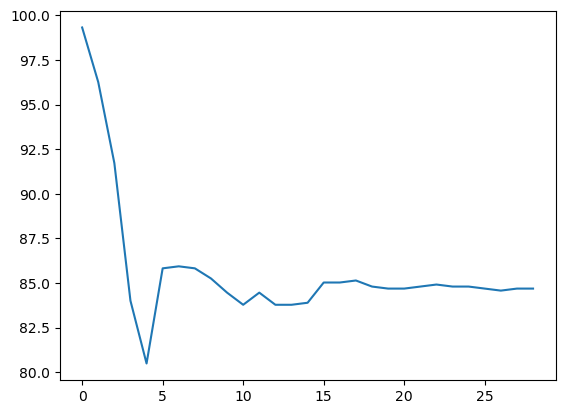

In [98]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# Naive Bayes

In [99]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [100]:
nb.fit(x_train,y_train)

MultinomialNB()

In [101]:
n_p=nb.predict(x_test)

In [102]:
nb_pr=precision_score(n_p,y_test)
nb_pr

0.4253731343283582

In [103]:
nb_re=recall_score(n_p,y_test)
nb_re

0.1958762886597938

In [104]:
nb_f1=f1_score(n_p,y_test)
nb_f1

0.26823529411764707

In [105]:
nc=confusion_matrix(n_p,y_test)
nc

array([[514,  77],
       [234,  57]], dtype=int64)

In [106]:
nb_ac=nc.diagonal().sum()/nc.sum()*100
nb_ac

64.73922902494331

In [107]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       591
           1       0.43      0.20      0.27       291

    accuracy                           0.65       882
   macro avg       0.56      0.53      0.52       882
weighted avg       0.60      0.65      0.60       882



# Conclusion

In [108]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","KNN","SVM","Naive Bayes"] 
list2=[lg_ac,dt_ac,rf_ac,ab_ac,xg_ac,kn_ac,sv_ac,nb_ac]  
list3=[lg_pr,dt_pr,rf_pr,ad_pr,xgb_pr,k_pr,s_pr,nb_pr]
list4=[lg_re,dt_re,rf_re,ad_re,xgb_re,k_re,s_re,nb_re]
list5=[lg_f1,dt_f1,rf_f1,ad_f1,xgb_f1,k_f1,s_f1,nb_f1]


In [109]:
df=pd.DataFrame({"Model Name":list1, "Accuracy":list2,"Precision":list3,"Recall":list4,"F1_score":list5})
df             #before treating classimbalance problem.


,Model Name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,84.807256,0.000000,0.000000,0.000000
1,Decision Tree,99.319728,1.000000,0.957143,0.978102
2,Random Forest,99.319728,0.977612,0.977612,0.977612
3,Ada Boost,99.319728,1.000000,0.957143,0.978102
4,XG Boost,99.319728,0.977612,0.977612,0.977612
5,KNN,85.941043,0.216418,0.604167,0.318681
6,SVM,84.807256,0.000000,0.000000,0.000000
7,Naive Bayes,64.739229,0.425373,0.195876,0.268235


If we consider accuracy then "Decision Tree", "Random Forest", "Ada Boost", "XG Boost" these models are over fitted and data have classimbalance problem so we have to treat classimbalance problem to get best fitted model.

# Classimbalance Treatment Using Random Undersampling

In [110]:
c_0,c_1=data["Attrition"].value_counts()
c_0,c_1

(3699, 711)

In [111]:
train_0=data[data["Attrition"]==0]
train_1=data[data["Attrition"]==1]

In [112]:
train_0.shape,train_1.shape

((3699, 20), (711, 20))

In [113]:
class_0under=train_0.sample(c_1)

In [114]:
class0_1=pd.concat([class_0under,train_1],axis=0)

In [115]:
class0_1.head()
class0_1.shape

(1422, 20)

In [116]:
class0_1.Attrition.value_counts()

0    711
1    711
Name: Attrition, dtype: int64

# Outlier Treatment

<AxesSubplot:>

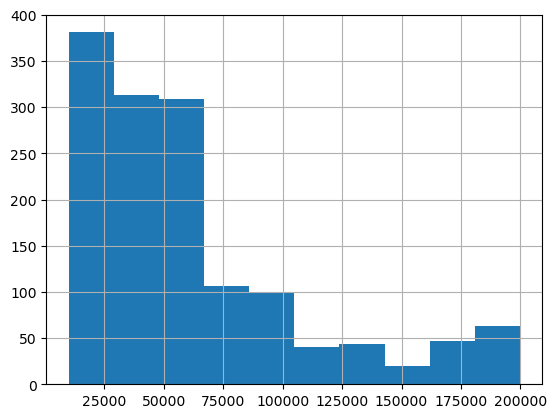

In [117]:
#MonthlyIncome
class0_1.MonthlyIncome.hist()

<AxesSubplot:ylabel='MonthlyIncome'>

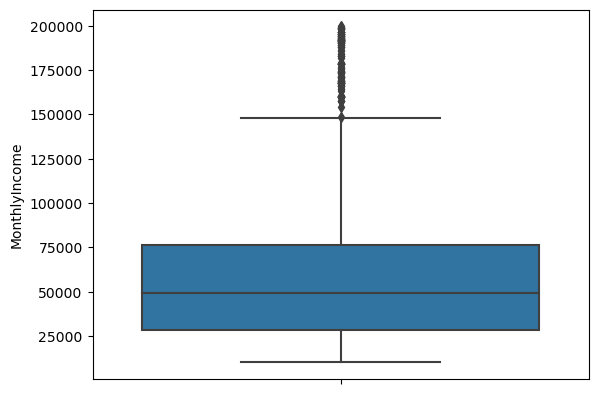

In [118]:
#MonthlyIncome
sns.boxplot(data=class0_1,y="MonthlyIncome")

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

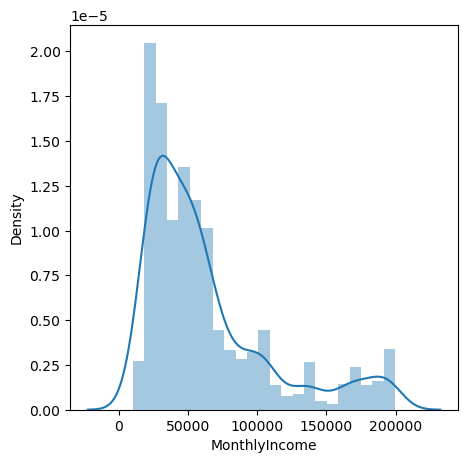

In [119]:
fig=plt.figure(figsize=(5,5))
sns.distplot(class0_1.MonthlyIncome)

In [120]:
class0_1["MonthlyIncome"].describe()


count      1422.000000
mean      63326.652602
std       46240.659532
min       10090.000000
25%       28560.000000
50%       48990.000000
75%       76440.000000
max      199730.000000
Name: MonthlyIncome, dtype: float64

In [121]:
iqr=class0_1.MonthlyIncome.quantile(0.75)-class0_1.MonthlyIncome.quantile(0.25)
iqr

47880.0

In [122]:
lb=class0_1["MonthlyIncome"].quantile(0.25)-(iqr*3)
ub=class0_1["MonthlyIncome"].quantile(0.75)+(iqr*3)
print(lb,ub)

-115080.0 220080.0


In [123]:
class0_1.loc[class0_1["MonthlyIncome"]>223100.0,"MonthlyIncome"]=223100.0

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

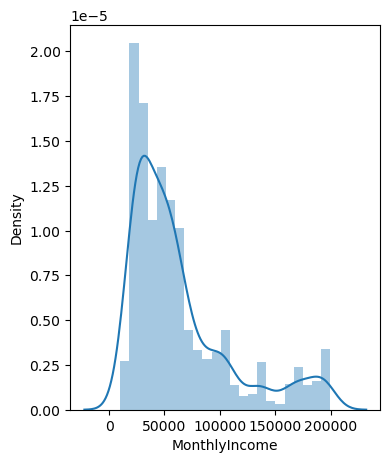

In [124]:
fig=plt.figure(figsize=(4,5))
sns.distplot(class0_1.MonthlyIncome)

#  DataTransformation

In [131]:
class0_1.skew()


Age                        0.509195
BusinessTravel            -1.410077
Department                 0.032938
DistanceFromHome           0.939826
Education                 -0.222251
EducationField             0.579345
Gender                    -0.435129
JobLevel                   1.026039
JobRole                   -0.386007
MaritalStatus             -0.375711
MonthlyIncome              1.475269
NumCompaniesWorked         0.960072
PercentSalaryHike          0.823312
StockOptionLevel           0.952680
TotalWorkingYears          1.288696
TrainingTimesLastYear      0.532223
YearsAtCompany             1.985563
YearsSinceLastPromotion    2.065684
YearsWithCurrManager       1.034210
Attrition                  0.000000
dtype: float64

In [132]:
class0_1.YearsSinceLastPromotion.value_counts()

0     609
1     308
2     155
7      84
3      54
4      49
5      42
6      35
11     17
9      14
15     13
13     13
14     11
8       9
10      6
12      3
Name: YearsSinceLastPromotion, dtype: int64

In [133]:
#MonthlyIncome-log transformation
class0_1.loc[class0_1["MonthlyIncome"]==0]# Check zero values present or not


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition


In [134]:
class0_1.MonthlyIncome.skew()

1.4752689663599123

In [135]:
v3=np.log(class0_1.MonthlyIncome)

(array([ 12.,  20., 173., 232., 204., 272., 173., 151.,  60., 125.]),
 array([ 9.21930011,  9.51784228,  9.81638444, 10.1149266 , 10.41346876,
        10.71201092, 11.01055309, 11.30909525, 11.60763741, 11.90617957,
        12.20472173]),
 <BarContainer object of 10 artists>)

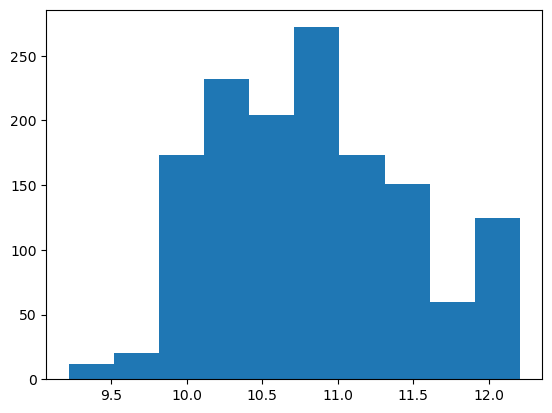

In [136]:
plt.hist(v3)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

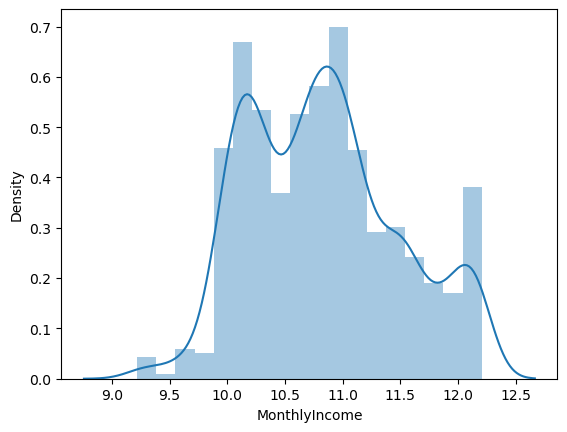

In [137]:
sns.distplot(v3)

In [138]:
v3.skew()

0.32769715885339273

In [139]:
#YearsSinceLastPromotion-square transformation
class0_1.loc[class0_1["YearsSinceLastPromotion"]==0]# Check zero values present or not

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
652,23,2,2,2,3,3,1,3,2,1,18780,1.0,13,1,1.0,2,1,0,1,0
2910,35,1,1,19,3,1,0,1,7,2,21450,1.0,13,0,10.0,6,10,0,8,0
3203,27,1,2,4,3,5,1,5,2,0,21940,1.0,12,0,6.0,5,6,0,4,0
1762,23,2,2,13,3,2,1,5,7,1,42210,1.0,11,1,5.0,4,4,0,2,0
4027,35,2,2,2,1,5,1,2,2,1,18590,0.0,25,1,4.0,2,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,30,2,1,10,4,1,0,2,6,2,55620,5.0,13,0,8.0,3,5,0,4,1
4368,30,1,2,3,2,3,1,2,0,2,28620,5.0,14,0,9.0,2,6,0,1,1
4381,29,2,1,7,1,1,0,1,6,2,21800,1.0,21,0,4.0,2,4,0,1,1
4386,33,2,2,11,4,2,1,1,6,1,71400,5.0,21,0,8.0,2,5,0,4,1


In [140]:
class0_1.YearsSinceLastPromotion.skew()

2.0656839218419685

In [141]:
v5=np.sqrt(class0_1.YearsSinceLastPromotion )

In [142]:
v5.skew()

0.7894304500937626

In [143]:
##YearsAtCompany-square transformation
class0_1.loc[class0_1["YearsAtCompany"]==0]# Check zero values present or not

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
94,48,2,2,13,4,3,1,4,7,1,98540,3.0,16,1,15.0,2,0,0,0,0
7,29,2,1,18,3,1,1,2,7,1,31430,2.0,22,3,10.0,2,0,0,0,0
2531,32,1,2,9,4,1,1,4,7,2,43270,8.0,13,0,4.0,4,0,0,0,0
2705,21,2,2,2,3,1,1,2,4,2,137570,1.0,12,1,0.0,3,0,0,0,0
3548,40,1,2,9,3,3,1,1,4,1,45230,5.0,16,1,5.0,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,32,2,1,26,3,3,0,2,5,2,88230,6.0,13,2,10.0,3,0,0,0,1
3937,33,2,1,10,3,1,1,1,7,2,43020,2.0,13,0,11.0,3,0,0,0,1
4154,37,2,1,2,3,1,1,1,7,2,56470,6.0,19,0,7.0,2,0,0,0,1
4279,19,2,1,5,2,1,1,1,3,2,53320,1.0,23,1,0.0,2,0,0,0,1


In [144]:
class0_1.YearsAtCompany.skew()

1.9855628985314395

In [145]:
v6=np.sqrt(class0_1.YearsAtCompany)

In [146]:
v6.skew()

0.5182349923746593

In [147]:
#TotalWorkingYears-square transformation

In [148]:
class0_1.loc[class0_1["TotalWorkingYears"]==0]# Check zero values present or not

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
2705,21,2,2,2,3,1,1,2,4,2,137570,1.0,12,1,0.0,3,0,0,0,0
2983,18,2,2,7,3,1,1,1,6,2,38120,1.0,15,0,0.0,3,0,0,0,0
3993,18,0,1,2,3,1,1,3,8,2,186060,1.0,24,2,0.0,4,0,0,0,0
38,18,2,1,1,4,1,1,1,7,2,23350,1.0,14,2,0.0,3,0,0,0,1
199,18,1,1,2,3,5,1,1,7,2,34680,1.0,18,2,0.0,4,0,0,0,1
570,18,0,1,2,4,3,1,3,2,2,109650,1.0,18,0,0.0,5,0,0,0,1
895,18,1,1,3,5,3,1,1,5,2,24790,1.0,12,1,0.0,2,0,0,0,1
1339,19,2,1,5,2,1,1,1,3,2,53320,1.0,23,1,0.0,2,0,0,0,1
1508,18,2,1,1,4,1,1,1,7,2,23350,1.0,14,2,0.0,3,0,0,0,1
1669,18,1,1,2,3,5,1,1,7,2,34680,1.0,18,2,0.0,4,0,0,0,1


In [149]:
v7=np.sqrt(class0_1.TotalWorkingYears)

In [150]:
v7.skew()

0.18902457600731679

# Correlation Matrix

In [151]:
cor=class0_1.corr()
cor

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.044913,0.016066,0.037544,-0.001992,0.120893,-0.063181,0.016953,-0.009420,-0.157187,-0.016940,0.300639,-0.026109,-0.006853,0.667387,-0.116833,0.367964,0.257896,0.262635,-0.188154
BusinessTravel,0.044913,1.000000,-0.021989,0.028542,0.009067,-0.001725,-0.025721,0.073583,0.049232,0.029265,-0.018975,0.007793,-0.064450,0.001984,0.054965,-0.087053,0.055215,0.005678,0.045955,-0.015662
Department,0.016066,-0.021989,1.000000,-0.038337,-0.030980,0.051492,0.005326,0.004168,-0.061141,-0.058445,-0.048769,0.026326,0.026234,0.001402,0.003943,-0.030405,0.032038,0.054660,0.053576,-0.076303
DistanceFromHome,0.037544,0.028542,-0.038337,1.000000,0.049439,-0.045296,-0.091802,-0.037351,0.011432,-0.009162,-0.018390,-0.013771,0.024864,-0.013299,0.028058,0.007528,0.078626,0.028823,0.074482,-0.020191
Education,-0.001992,0.009067,-0.030980,0.049439,1.000000,0.013947,0.029985,0.074512,0.027584,-0.004637,0.029901,0.052770,-0.043241,-0.033981,0.037341,0.028778,0.029947,0.019149,0.028890,0.007621
EducationField,0.120893,-0.001725,0.051492,-0.045296,0.013947,1.000000,-0.014483,-0.009553,0.055605,-0.056076,-0.006003,0.043956,-0.011327,0.039050,0.107761,-0.031128,0.049008,0.082991,0.050587,-0.075001
Gender,-0.063181,-0.025721,0.005326,-0.091802,0.029985,-0.014483,1.000000,-0.024440,-0.016740,-0.012726,0.017600,-0.052079,-0.001491,0.057175,-0.068361,0.013211,-0.095088,-0.055666,-0.058155,0.028786
JobLevel,0.016953,0.073583,0.004168,-0.037351,0.074512,-0.009553,-0.024440,1.000000,-0.056169,0.041767,0.074307,-0.007750,-0.010273,-0.011813,-0.028746,-0.027604,-0.030777,-0.022958,-0.040303,-0.000651
JobRole,-0.009420,0.049232,-0.061141,0.011432,0.027584,0.055605,-0.016740,-0.056169,1.000000,0.020683,0.025639,-0.022468,0.028539,0.061348,-0.046082,0.050806,-0.043758,-0.037352,-0.002468,0.048606
MaritalStatus,-0.157187,0.029265,-0.058445,-0.009162,-0.004637,-0.056076,-0.012726,0.041767,0.020683,1.000000,-0.092219,-0.063842,0.003850,0.028160,-0.138269,0.012996,-0.075244,-0.040413,-0.029204,0.192218


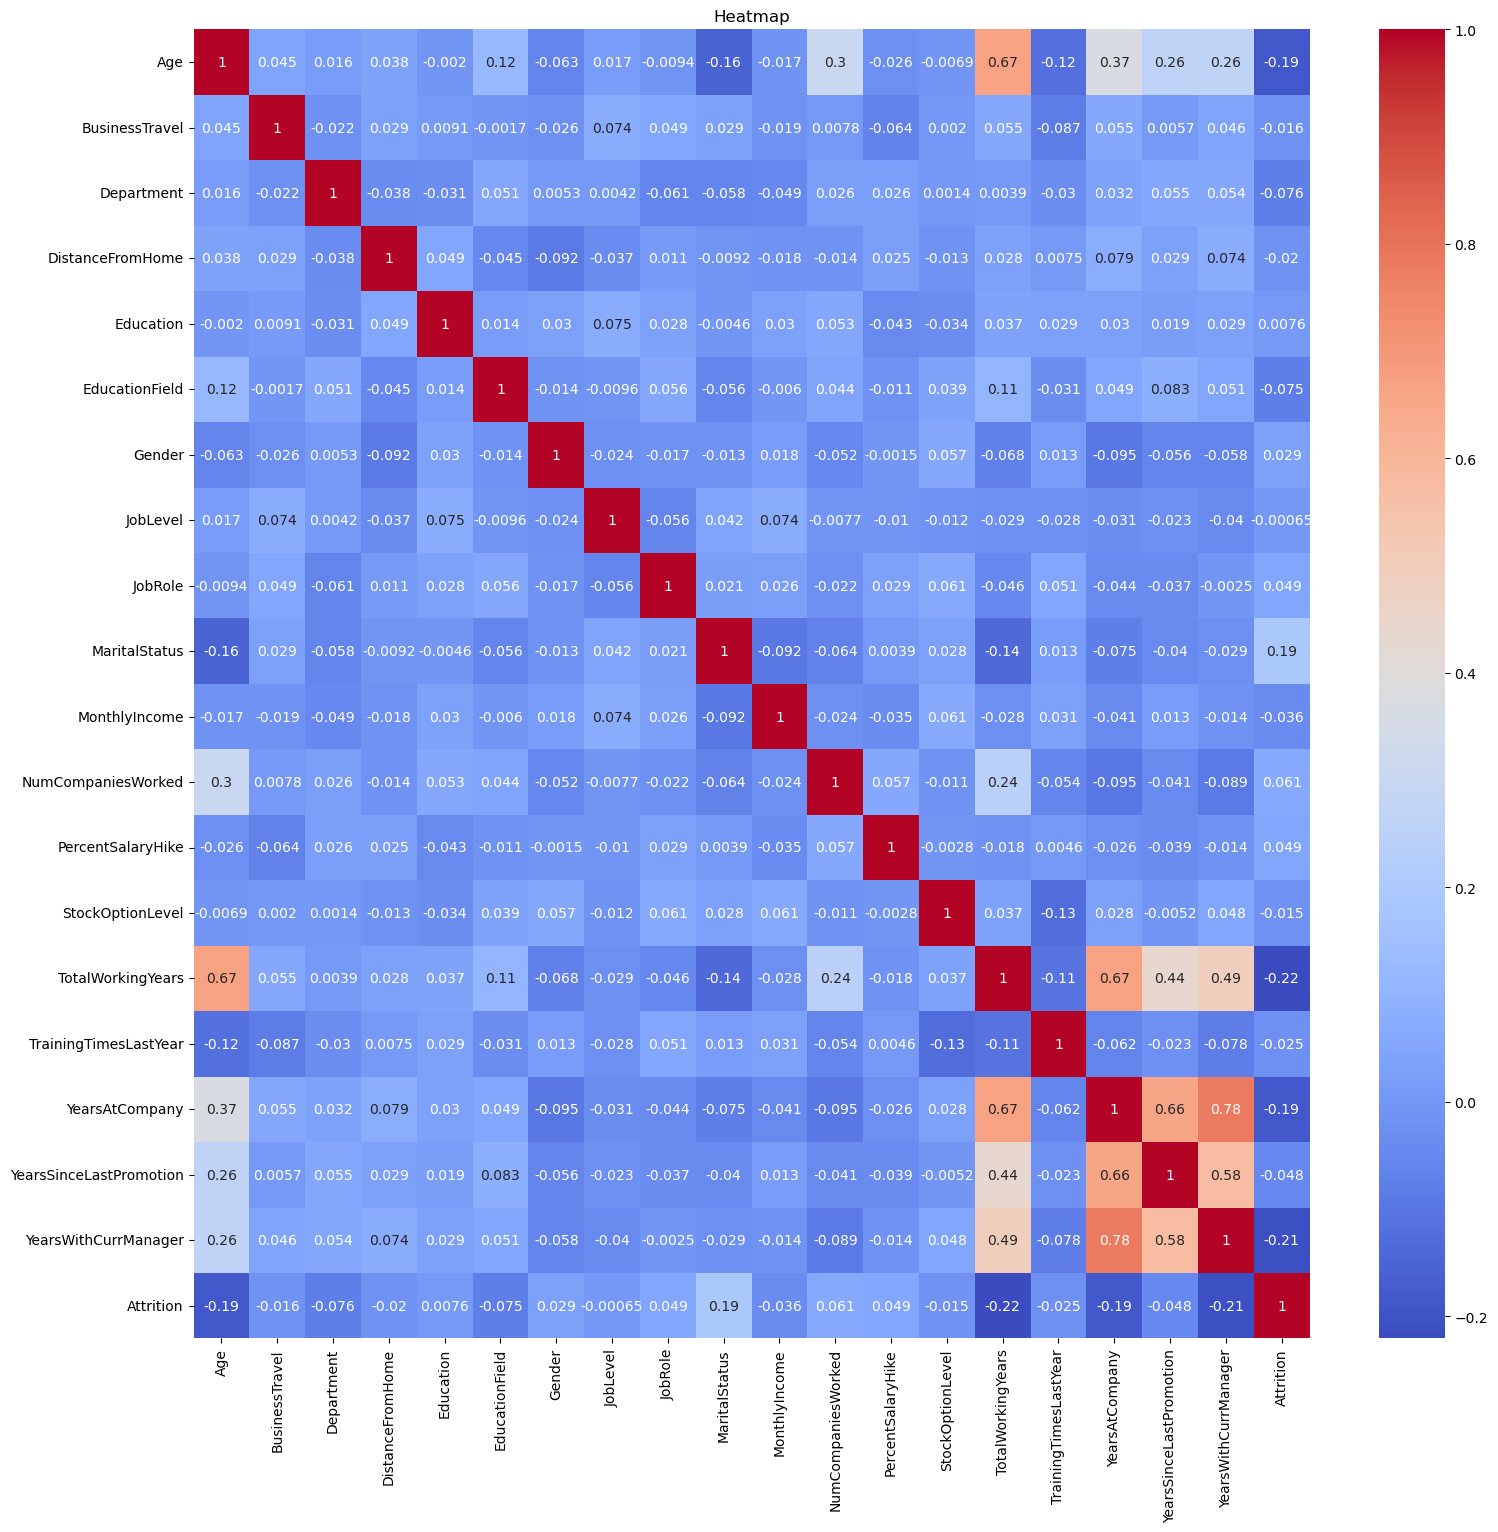

In [152]:
plt.figure(figsize=(18,17))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(cor,cmap="coolwarm",annot=True)
plt.title("Heatmap")
plt.show()

# Split Data After Class Imblance

In [153]:
class0_1.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
652,23,2,2,2,3,3,1,3,2,1,18780,1.0,13,1,1.0,2,1,0,1,0
1076,27,1,1,16,4,3,1,3,0,1,49980,0.0,20,2,8.0,3,7,7,3,0
2180,36,1,2,16,2,1,1,1,6,1,12810,2.0,11,0,17.0,2,15,6,13,0
2910,35,1,1,19,3,1,0,1,7,2,21450,1.0,13,0,10.0,6,10,0,8,0
1366,32,1,2,2,2,1,0,1,4,2,21660,1.0,19,1,9.0,4,9,3,7,0


In [154]:
o_x=class0_1.iloc[:,0:-1]
o_y=class0_1.iloc[:,-1]

In [155]:
o_x_train,o_x_test,o_y_train,o_y_test=train_test_split(o_x,o_y,test_size=0.2,random_state=90)
o_x_train.shape,o_x_test.shape,o_y_train.shape,o_y_test.shape

((1137, 19), (285, 19), (1137,), (285,))

# Feature selection

In [156]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [157]:
rfe=RFE(dTree)

In [158]:
rfe.fit(o_x_train,o_y_train)


RFE(estimator=DecisionTreeClassifier())

In [159]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False])

In [160]:
df3=pd.DataFrame({"Score":list(rfe.support_),"columns":list(class0_1.iloc[:,0:19])})
df3

,Score,columns
0,True,Age
1,False,BusinessTravel
2,False,Department
3,True,DistanceFromHome
4,False,Education
5,True,EducationField
6,False,Gender
7,False,JobLevel
8,True,JobRole
9,False,MaritalStatus


In [161]:
s_df3=df3.sort_values(["Score"],ascending=False)
s_df3

,Score,columns
0,True,Age
12,True,PercentSalaryHike
3,True,DistanceFromHome
16,True,YearsAtCompany
5,True,EducationField
14,True,TotalWorkingYears
8,True,JobRole
10,True,MonthlyIncome
11,True,NumCompaniesWorked
17,False,YearsSinceLastPromotion


In [162]:
df4=class0_1.drop(["Gender","BusinessTravel","DistanceFromHome","MaritalStatus","JobLevel","StockOptionLevel","TrainingTimesLastYear","Department","YearsSinceLastPromotion","YearsWithCurrManager"],axis=1)

In [163]:
df4.head()

,Age,Education,EducationField,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,Attrition
652,23,3,3,2,18780,1.0,13,1.0,1,0
1076,27,4,3,0,49980,0.0,20,8.0,7,0
2180,36,2,1,6,12810,2.0,11,17.0,15,0
2910,35,3,1,7,21450,1.0,13,10.0,10,0
1366,32,2,1,4,21660,1.0,19,9.0,9,0


# Model Buliding After Classimbalance Treatment  And Feature Selection

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
t_x=df4.iloc[:,0:9]
t_y=df4.iloc[:,-1]

In [166]:
x5_tr,x5_te,y5_tr,y5_te=train_test_split(t_x,t_y,test_size=0.2,random_state=100)

In [167]:
x5_tr.shape,x5_te.shape,y5_tr.shape,y5_te.shape

((1137, 9), (285, 9), (1137,), (285,))

# logistic regression

In [168]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [169]:
lg.fit(x5_tr,y5_tr)

LogisticRegression()

In [170]:
lg_p2=lg.predict(x5_te)

In [171]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [172]:
cf=confusion_matrix(lg_p2,y5_te)
cf

array([[80, 32],
       [76, 97]], dtype=int64)

In [173]:
acc=cf.diagonal().sum()/cf.sum()*100
acc

62.10526315789474

In [174]:
print(classification_report(lg_p2,y5_te))

              precision    recall  f1-score   support

           0       0.51      0.71      0.60       112
           1       0.75      0.56      0.64       173

    accuracy                           0.62       285
   macro avg       0.63      0.64      0.62       285
weighted avg       0.66      0.62      0.62       285



In [175]:
lg_pre=precision_score(lg_p2,y5_te)
lg_pre

0.751937984496124

In [176]:
lg_rec=recall_score(lg_p2,y5_te)

In [177]:
lg_f=f1_score(lg_p2,y5_te)

# Decision Tree



In [178]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [179]:
dt.fit(x5_tr,y5_tr)

DecisionTreeClassifier()

In [180]:
dt_p2=dt.predict(x5_te)

In [181]:
dt_cf=confusion_matrix(dt_p2,y5_te)
dt_cf

array([[127,   0],
       [ 29, 129]], dtype=int64)

In [182]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

89.82456140350877

In [183]:
print(classification_report(dt_p2,y5_te))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       127
           1       1.00      0.82      0.90       158

    accuracy                           0.90       285
   macro avg       0.91      0.91      0.90       285
weighted avg       0.92      0.90      0.90       285



In [184]:
dt_pre=precision_score(dt_p2,y5_te)

In [185]:
dt_rec=recall_score(dt_p2,y5_te)

In [186]:
dt_f=f1_score(dt_p2,y5_te)

# KNN

In [187]:
knn.fit(x5_tr,y5_tr)

KNeighborsClassifier(n_neighbors=29)

In [188]:
k_p2=knn.predict(x5_te)

In [189]:
cf=confusion_matrix(k_p2,y5_te)
cf

array([[88, 64],
       [68, 65]], dtype=int64)

In [190]:
kacc=cf.diagonal().sum()/cf.sum()*100
kacc

53.68421052631579

In [191]:
print(classification_report(k_p2,y5_te))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       152
           1       0.50      0.49      0.50       133

    accuracy                           0.54       285
   macro avg       0.53      0.53      0.53       285
weighted avg       0.54      0.54      0.54       285



In [192]:
K_pre=precision_score(k_p2,y5_te)

In [193]:
K_rec=recall_score(k_p2,y5_te)

In [194]:
K_f=f1_score(k_p2,y5_te)

# Random forest

In [195]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [196]:
rf.fit(x5_tr,y5_tr)

RandomForestClassifier()

In [197]:
rf_p2=rf.predict(x5_te)
rf_p2

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [198]:
rf_cf=confusion_matrix(rf_p2,y5_te)
rf_cf

array([[135,   0],
       [ 21, 129]], dtype=int64)

In [199]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

92.63157894736842

In [200]:
print(classification_report(rf_p2,y5_te))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       135
           1       1.00      0.86      0.92       150

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.94      0.93      0.93       285



In [201]:
rf_pre=precision_score(rf_p2,y5_te)

In [202]:
rf_rec=recall_score(rf_p2,y5_te)

In [203]:
rf_f=f1_score(rf_p2,y5_te)

# ADA Boost

In [204]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [205]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [206]:
adbo.fit(x5_tr,y5_tr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [207]:
ad_p2=adbo.predict(x5_te)
ad_p2

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [208]:
ad_cf=confusion_matrix(ad_p2,y5_te)
ad_cf

array([[125,   0],
       [ 31, 129]], dtype=int64)

In [209]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

89.12280701754386

In [210]:
print(classification_report(ad_p2,y5_te))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       125
           1       1.00      0.81      0.89       160

    accuracy                           0.89       285
   macro avg       0.90      0.90      0.89       285
weighted avg       0.91      0.89      0.89       285



In [211]:
adbo_pre=precision_score(ad_p2,y5_te)

In [212]:
adbo_rec=recall_score(ad_p2,y5_te)

In [213]:
adbo_f=f1_score(ad_p2,y5_te)

# XG Boost

In [214]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [215]:
xgb.fit(x5_tr,y5_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [216]:
xgb_p2=xgb.predict(x5_te)
xgb_p2

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [217]:
xgb_cf=confusion_matrix(xgb_p2,y5_te)
xgb_cf

array([[125,   0],
       [ 31, 129]], dtype=int64)

In [218]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc

89.12280701754386

In [219]:
print(classification_report(xgb_p2,y5_te))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       125
           1       1.00      0.81      0.89       160

    accuracy                           0.89       285
   macro avg       0.90      0.90      0.89       285
weighted avg       0.91      0.89      0.89       285



In [220]:
xgb_pre=precision_score(xgb_p2,y5_te)

In [221]:
xgb_rec=recall_score(xgb_p2,y5_te)

In [222]:
xgb_f=f1_score(xgb_p2,y5_te)

# SVM

In [223]:
svc.fit(x5_tr,y5_tr)

SVC()

In [224]:
s_p2=svc.predict(x5_te)
s_p2

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [225]:
cf_s=confusion_matrix(s_p2,y5_te)
cf_s

array([[ 40,  36],
       [116,  93]], dtype=int64)

In [226]:
acc_s=cf_s.diagonal().sum()/cf_s.sum()*100
acc_s

46.666666666666664

In [227]:
print(classification_report(s_p2,y5_te))

              precision    recall  f1-score   support

           0       0.26      0.53      0.34        76
           1       0.72      0.44      0.55       209

    accuracy                           0.47       285
   macro avg       0.49      0.49      0.45       285
weighted avg       0.60      0.47      0.50       285



In [228]:
svm_pre=precision_score(s_p2,y5_te)

In [229]:
svm_rec=recall_score(s_p2,y5_te)

In [230]:
svm_f=f1_score(s_p2,y5_te)

# Naivy Bayes

In [231]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [232]:
nb.fit(x5_tr,y5_tr)

MultinomialNB()

In [233]:
n_p2=nb.predict(x5_te)

In [234]:
nc=confusion_matrix(n_p2,y5_te)
nc

array([[82, 35],
       [74, 94]], dtype=int64)

In [235]:
acc_n=nc.diagonal().sum()/nc.sum()*100
acc_n

61.75438596491228

In [236]:
print(classification_report(n_p2,y5_te))

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       117
           1       0.73      0.56      0.63       168

    accuracy                           0.62       285
   macro avg       0.63      0.63      0.62       285
weighted avg       0.65      0.62      0.62       285



In [237]:
nb_pre=precision_score(n_p2,y5_te)

In [238]:
nb_rec=recall_score(n_p2,y5_te)

In [239]:
nb_f=f1_score(n_p2,y5_te)
nb_f

0.632996632996633

# Conclusion

In [240]:
l6=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","KNN","SVM","Naive Bayes"] 
l7=[acc,dt_acc,rf_acc,ad_acc,xgb_acc,kacc,acc_s,acc_n] 
l8=[lg_pre,dt_pre,rf_pre,adbo_pre,xgb_pre,K_pre,svm_pre,nb_pre]
l9=[lg_rec,dt_rec,rf_rec,adbo_rec,xgb_rec,K_rec,svm_rec,nb_rec]
l10=[lg_f,dt_f,rf_f,adbo_f,xgb_f,K_f,svm_f,nb_f]

In [241]:
d2=pd.DataFrame({"Model Name":l6,"Accuracy":l7,"Precision":l8,"Recall":l9,"F1_score":l10})
d2

,Model Name,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,62.105263,0.751938,0.560694,0.642384
1,Decision Tree,89.824561,1.000000,0.816456,0.898955
2,Random Forest,92.631579,1.000000,0.860000,0.924731
3,Ada Boost,89.122807,1.000000,0.806250,0.892734
4,XG Boost,89.122807,1.000000,0.806250,0.892734
5,KNN,53.684211,0.503876,0.488722,0.496183
6,SVM,46.666667,0.720930,0.444976,0.550296
7,Naive Bayes,61.754386,0.728682,0.559524,0.632997


We consider accuracy then "Random Forest" is best fitted model with 92% accuracy with Precision(0:89,1:1),Recall(0:1,1:0.88) and f1-Score(0:0.93,1:0.92).so Random Forest is Best Fitted Model with 92% accuracy.